In [1]:
import os
import sys
from pathlib import Path

sys.path.append(str(Path().resolve().parent))
sys.path.append(str(Path().resolve().parent.parent))

import numpy as np
import pandas as pd
import json

import geopandas as gpd
import matplotlib.pyplot as plt

from shapely.geometry import Point

/home/mila/t/tengmeli/.conda/envs/glc/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/home/mila/t/tengmeli/.conda/envs/glc/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


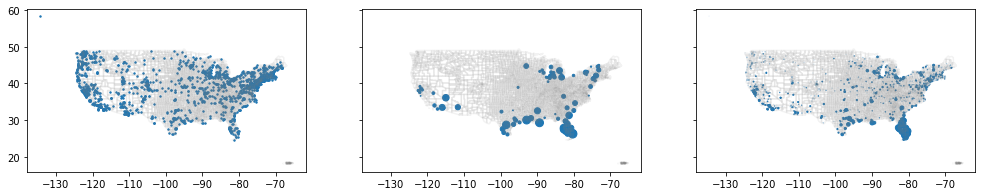

In [115]:
idx_species = 183
name_species = np.array(species)[non_songbird_idx][idx_species]

gdf[name_species] = ""
gdf[name_species + " pred"] = ""

path_gt = "/ecosystem-embedding/ebird_data_june/"

path_pred = "/network/projects/_groups/ecosystem-embeddings/ebird_checkpoints/resnet18_location_300_epochs/preds"
for index, row in gdf.iterrows():
    if row["split"] in ["train", "val"]:
        gdf[name_species + " pred"][index] = np.load(os.path.join(path_pred, gdf["hotspot_id"][index] + ".npy"))[idx_species]
        with open(os.path.join(path_gt, gdf["hotspot_id"][index] + ".json")) as f:
            data=np.array(json.load(f)["probs"])[non_songbird_idx][idx_species]
        gdf[name_species][index] = data


sub= gdf[gdf["split"].isin(["val"])]

sub[name_species] = sub[name_species].astype(float)
sub[name_species + " pred"] = sub[name_species + " pred"].astype(float)

ig, (ax0, ax1, ax2) = plt.subplots(1, 3, sharey=True, figsize=(17,12))

#train_gdf.drop_duplicates(["geometry"]).boundary.plot(ax = ax, alpha = 0.4, edgecolor = "gray")
geoDatav[~geoDatav["STATE"].isin(["02", "15"])].boundary.plot(ax=ax0, alpha = 0.1, edgecolor = "gray" )
geoDatav[~geoDatav["STATE"].isin(["02", "15"])].boundary.plot(ax=ax1, alpha = 0.1, edgecolor = "gray" )

geoDatav[~geoDatav["STATE"].isin(["02", "15"])].boundary.plot(ax=ax2, alpha = 0.1, edgecolor = "gray" )
sub.plot(ax=ax0,markersize= 2)
#sub.plot(ax=ax,markersize= sub['Accipiter cooperii']*50)
sub.plot(ax=ax1,markersize= sub[name_species]*70)
a = sub[name_species + " pred"].copy()
a[a <  10e-6] = 0
sub.plot(ax=ax2,markersize= a*70)
plt.show()

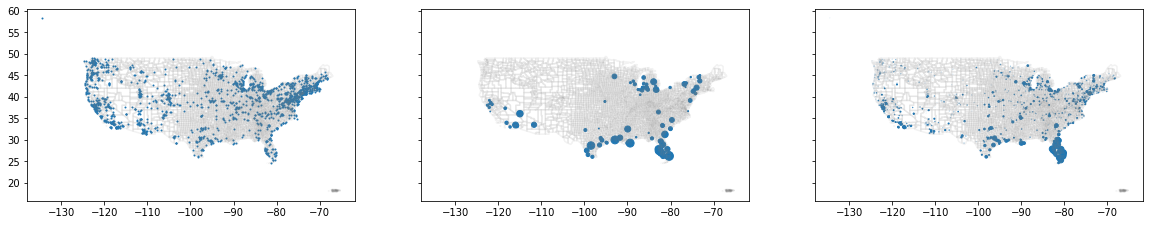

In [117]:

ig, (ax0, ax1, ax2) = plt.subplots(1, 3, sharey=True, figsize=(20,20))

#train_gdf.drop_duplicates(["geometry"]).boundary.plot(ax = ax, alpha = 0.4, edgecolor = "gray")
geoDatav[~geoDatav["STATE"].isin(["02", "15"])].boundary.plot(ax=ax0, alpha = 0.1, edgecolor = "gray" )
geoDatav[~geoDatav["STATE"].isin(["02", "15"])].boundary.plot(ax=ax1, alpha = 0.1, edgecolor = "gray" )

geoDatav[~geoDatav["STATE"].isin(["02", "15"])].boundary.plot(ax=ax2, alpha = 0.1, edgecolor = "gray" )
sub.plot(ax=ax0,markersize= 1)
#sub.plot(ax=ax,markersize= sub['Accipiter cooperii']*50)
sub.plot(ax=ax1,markersize= sub[name_species]*70)
a = sub[name_species + " pred"].copy()
a[a <  10e-6] = 0
sub.plot(ax=ax2,markersize= a*70)
plt.show()

/home/mila/t/tengmeli/.conda/envs/glc/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/home/mila/t/tengmeli/.conda/envs/glc/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/home/mila/t/tengmeli/.conda/envs/glc/lib/python3.6/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.o

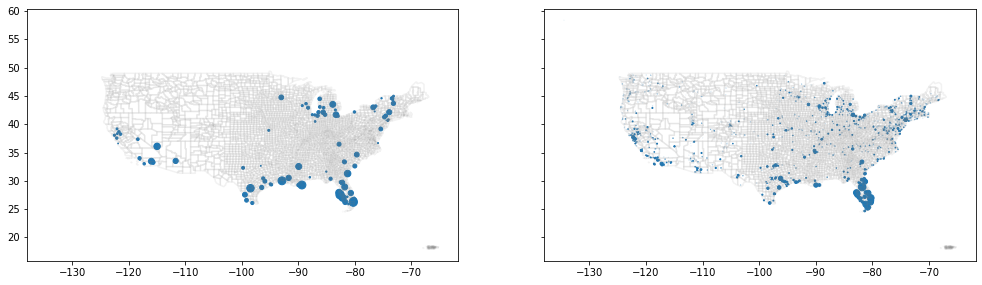

In [112]:
idx_species = 183
name_species = np.array(species)[non_songbird_idx][idx_species]

gdf[name_species] = ""
gdf[name_species + " pred"] = ""

path_gt = "/network/scratch/t/tengmeli/scratch/ecosystem-embedding/ebird_data_june/"

path_pred = "/network/projects/_groups/ecosystem-embeddings/ebird_checkpoints/resnet18_location_300_epochs/preds"

for index, row in gdf.iterrows():
    if row["split"] in ["train", "val"]:
        gdf[name_species + " pred"][index] = np.load(os.path.join(path_pred, gdf["hotspot_id"][index] + ".npy"))[idx_species]
        with open(os.path.join(path_gt, gdf["hotspot_id"][index] + ".json")) as f:
            data=np.array(json.load(f)["probs"])[non_songbird_idx][idx_species]
        gdf[name_species][index] = data

sub= gdf[gdf["split"].isin(["val"])]

sub[name_species] = sub[name_species].astype(float)
sub[name_species + " pred"] = sub[name_species + " pred"].astype(float)

ig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(17,12))

#train_gdf.drop_duplicates(["geometry"]).boundary.plot(ax = ax, alpha = 0.4, edgecolor = "gray")
geoDatav[~geoDatav["STATE"].isin(["02", "15"])].boundary.plot(ax=ax1, alpha = 0.1, edgecolor = "gray" )

geoDatav[~geoDatav["STATE"].isin(["02", "15"])].boundary.plot(ax=ax2, alpha = 0.1, edgecolor = "gray" )

#sub.plot(ax=ax,markersize= sub['Accipiter cooperii']*50)
sub.plot(ax=ax1,markersize= sub[name_species]*70)
a = sub[name_species + " pred"].copy()
a[a <  10e-6] = 0
sub.plot(ax=ax2,markersize= a*70)
plt.show()

/home/mila/t/tengmeli/.conda/envs/glc/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/home/mila/t/tengmeli/.conda/envs/glc/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/home/mila/t/tengmeli/.conda/envs/glc/lib/python3.6/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.o

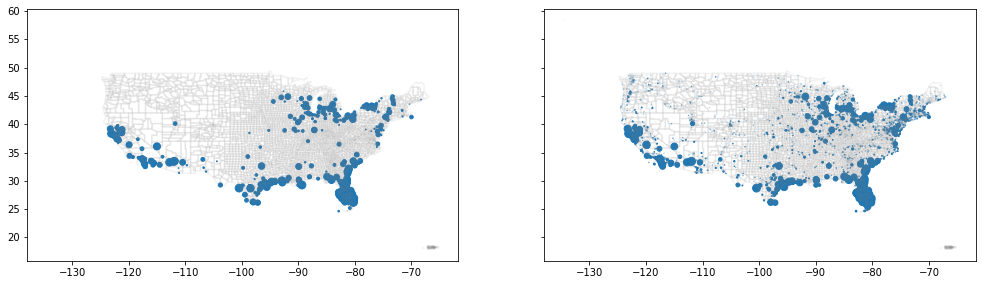

In [104]:
idx_species = 183
name_species = np.array(species)[non_songbird_idx][idx_species]

gdf[name_species] = ""
gdf[name_species + " pred"] = ""

path_gt = "/ecosystem-embedding/ebird_data_june/"

path_pred = "/network/projects/_groups/ecosystem-embeddings/ebird_checkpoints/resnet18_location_300_epochs/preds"

for index, row in gdf.iterrows():
    if row["split"] in ["train", "val"]:
        gdf[name_species + " pred"][index] = np.load(os.path.join(path_pred, gdf["hotspot_id"][index] + ".npy"))[idx_species]
        with open(os.path.join(path_gt, sub["hotspot_id"][index] + ".json")) as f:
            data=np.array(json.load(f)["probs"])[non_songbird_idx][idx_species]
        gdf[name_species][index] = data

sub= gdf[gdf["split"].isin(["train","val"])]

sub[name_species] = sub[name_species].astype(float)
sub[name_species + " pred"] = sub[name_species + " pred"].astype(float)

ig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(17,12))

#train_gdf.drop_duplicates(["geometry"]).boundary.plot(ax = ax, alpha = 0.4, edgecolor = "gray")
geoDatav[~geoDatav["STATE"].isin(["02", "15"])].boundary.plot(ax=ax1, alpha = 0.1, edgecolor = "gray" )

geoDatav[~geoDatav["STATE"].isin(["02", "15"])].boundary.plot(ax=ax2, alpha = 0.1, edgecolor = "gray" )

#sub.plot(ax=ax,markersize= sub['Accipiter cooperii']*50)
sub.plot(ax=ax1,markersize= sub[name_species]*70)
a = sub[name_species + " pred"].copy()
a[a <  10e-6] = 0
sub.plot(ax=ax2,markersize= a*70)
plt.show()

In [3]:
geoDatav = gpd.read_file('https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/US-counties.geojson')

In [2]:
df = pd.read_csv("/network/projects/_groups/ecosystem-embeddings/hotspot_split_june/hotspots_june_filtered.csv")
geometry = [Point(xy) for xy in zip(df['lon'], df['lat'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry)   


In [4]:
train = pd.read_csv("/ecosystem-embedding/training/train_clustered_vf.csv")
val = pd.read_csv("/ecosystem-embedding/training/valid_clustered_vf.csv")
test = pd.read_csv("/ecosystem-embedding/training/test_clustered_vf.csv")
gdf["split"] = ""


In [5]:
idx = gdf[gdf["hotspot_id"].isin(list(train["hotspot"]))].index
gdf.loc[idx,"split"] = "train"

idx = gdf[gdf["hotspot_id"].isin(list(val["hotspot"]))].index
gdf.loc[idx,"split"] = "val"
idx = gdf[gdf["hotspot_id"].isin(list(test["hotspot"]))].index
gdf.loc[idx,"split"] = "test"

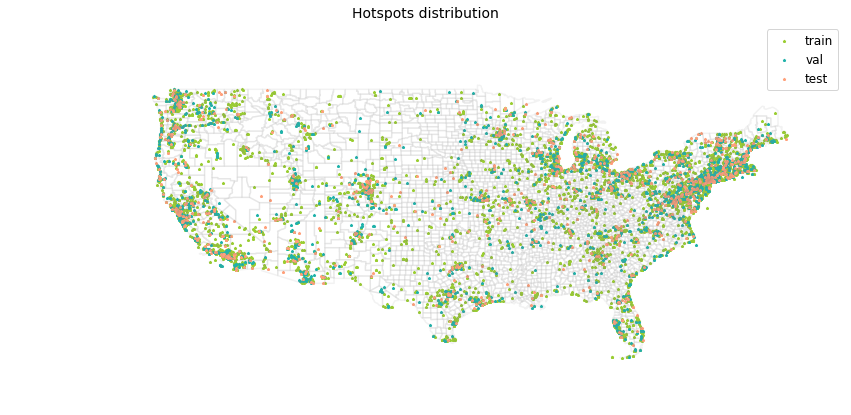

In [7]:
fig, ax = plt.subplots(figsize =(15,10))
#train_gdf.drop_duplicates(["geometry"]).boundary.plot(ax = ax, alpha = 0.4, edgecolor = "gray")

#remove Alaska and Hawaii
geoDatav[~geoDatav["STATE"].isin(["02", "15"])].boundary.plot(ax=ax, alpha = 0.1, edgecolor = "gray" )
gdf[gdf["split"]=="train"].plot(ax=ax,marker='*', color='yellowgreen', markersize=6, label = "train")
gdf[gdf["split"]=="val"].plot(ax=ax, marker='*', color='lightseagreen', markersize=6, label = "val")
gdf[gdf["split"]=="test"].plot(ax=ax, marker='*', color='lightsalmon', markersize=6, label = "test")
ax.set_ylim(top=55, bottom=20)
plt.axis('off')
#fig.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
plt.legend(prop={'size':12})
plt.title("Hotspots distribution", fontsize=14)
plt.savefig("hotspots_final.png")
plt.show()



In [25]:
plt.savefig("hotspots_final.png")

<Figure size 432x288 with 0 Axes>

In [7]:
import numpy as np

In [11]:
with open("/network/projects/_groups/ecosystem-embeddings/species_splits/species_list.txt") as f:
    species = [i.strip("\n") for i in f.readlines()]

In [12]:
non_songbird_idx = np.load("/network/projects/_groups/ecosystem-embeddings/species_splits/not_songbirds_idx.npy")


In [69]:
idx_species = 338
name_species = np.array(species)[non_songbird_idx][idx_species]
name_species

'Spatula cyanoptera'

In [20]:
#look at Common Gallinule, a gruiforme Identification Blackish, chicken-like marsh bird, often found near cattails, never far from water.
name_species = "Gallinula galeata"
idx_species = np.where(np.array(species)[non_songbird_idx] == name_species)[0][0]
idx_species                     

183

In [70]:


gdf[name_species] = ""
gdf[name_species + " pred"] = ""

path_gt = "/ecosystem-embedding/ebird_data_june/"

path_pred = "/network/projects/_groups/ecosystem-embeddings/ebird_checkpoints/resnet18_location_300_epochs/preds"

sub= gdf[gdf["split"].isin(["train","val"])]

for index, row in gdf.iterrows():
    if row["split"] in ["train", "val"]:
        gdf[name_species + " pred"][index] = np.load(os.path.join(path_pred, gdf["hotspot_id"][index] + ".npy"))[idx_species]
        with open(os.path.join(path_gt, gdf["hotspot_id"][index] + ".json")) as f:
            data=np.array(json.load(f)["probs"])[non_songbird_idx][idx_species]
        gdf[name_species][index] = data


/home/mila/t/tengmeli/.conda/envs/glc/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/home/mila/t/tengmeli/.conda/envs/glc/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [ ]:
sub_val

In [72]:
sub= gdf[gdf["split"].isin(["train","val"])]

In [73]:
val= gdf[gdf["split"].isin(["val"])]
train= gdf[gdf["split"].isin(["train"])]

In [25]:

sub_val = sub[sub["split"]=="val"]
print("mae", np.mean(np.abs(sub_val["Gallinula galeata"] - sub_val["Gallinula galeata pred"] )))
print("mse", np.mean(np.abs(sub_val["Gallinula galeata"] - sub_val["Gallinula galeata pred"] )**2))

sub_train = sub[sub["split"]=="train"]
print("mae", np.mean(np.abs(sub_train["Gallinula galeata"] - sub_train["Gallinula galeata pred"] )))
print("mse", np.mean(np.abs(sub_train["Gallinula galeata"] - sub_train["Gallinula galeata pred"] )**2))

In [26]:
def centercrop(rgb):
    im = Image.fromarray(np.transpose(rgb, (1,2,0)))
    width, height = im.size   # Get dimensions
    new_width = 256
    new_height = 256
    left = (width - new_width)/2
    top = (height - new_height)/2
    right = (width + new_width)/2
    bottom = (height + new_height)/2

    # Crop the center of the image
    im = im.crop((left, top, right, bottom))
    return(im)

In [42]:
high_duck =sub.sort_values(name_species, ascending=False)
high_duck = high_duck.reset_index()

In [85]:
name_species = "Spatula cyanoptera" #"Gallinula galeata"
sub_val = sub[sub["split"]=="val"]
print("mae", np.mean(np.abs(sub_val[name_species] - sub_val[name_species] )))
print("mse", np.mean(np.abs(sub_val[name_species] - sub_val[name_species] )**2))

sub_train = sub[sub["split"]=="train"]
print("mae", np.mean(np.abs(sub_train[name_species] - sub_train[name_species] )))
print("mse", np.mean(np.abs(sub_train[name_species] - sub_train[name_species] )**2))


name_species = "Gallinula galeata"

mae 0.0
mse 0.0
mae 0.0
mse 0.0


In [35]:
from PIL import Image, ImageDraw, ImageFont

In [36]:
def write_text(im, title_text, pos = (25,220), color = (255, 51, 239)):
    font = ImageFont.load_default()
    
    font = ImageFont.truetype("./arial-bold.ttf", 24)
    image_editable = ImageDraw.Draw(im)
    image_editable.text(pos, title_text, color, font=font)
    return (im)

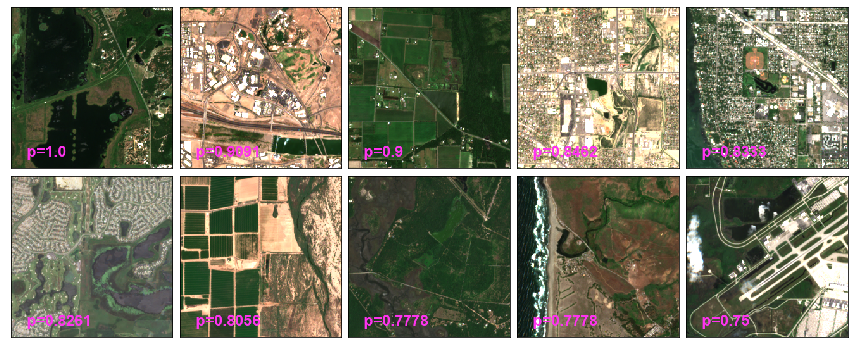

In [46]:
# https://matplotlib.org/mpl_toolkits/axes_grid/users/overview.html
from mpl_toolkits.axes_grid1 import ImageGrid
fig = plt.figure(1,(15,15))
grid = ImageGrid(fig, 111,
                 nrows_ncols=(2,5),
                 axes_pad=0.1,
                 share_all=True
                 )
grid[0].get_yaxis().set_ticks([])
grid[0].get_xaxis().set_ticks([])
#"Sample locations with high presence of "+name_species
#plt.subplots_adjust(top=0.85)
for index, row in high_duck[high_duck["split"] == "train"][:10].reset_index().iterrows():
    rgb = np.load(os.path.join("/ecosystem-embedding/satellite_data/", row["hotspot_id"] +"_rgb.npy"))
    im = centercrop(rgb)
    im=write_text(im, "p=" + str(round(row[name_species], 4)))
    image =np.array(im)    
    grid[index].imshow(image,interpolation='none')


In [ ]:
high_duck[high_duck["split"] == "train"][:10]

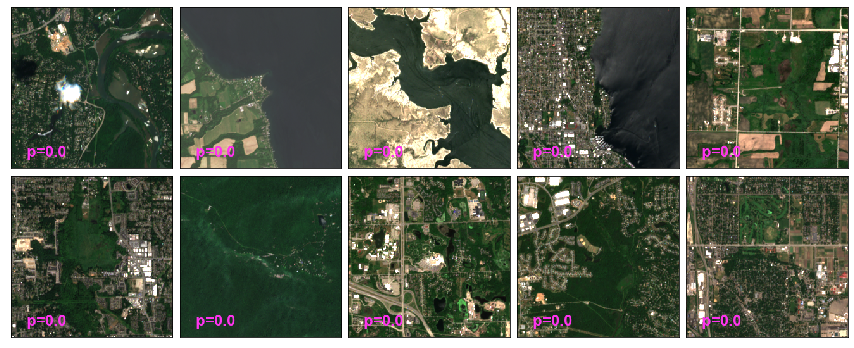

In [39]:
low_duck = sub.sort_values(name_species, ascending=True)[:10]
low_duck = low_duck.reset_index()

# https://matplotlib.org/mpl_toolkits/axes_grid/users/overview.html

from mpl_toolkits.axes_grid1 import ImageGrid
fig = plt.figure(1,(15,15))
grid = ImageGrid(fig, 111,
                 nrows_ncols=(2,5),
                 axes_pad=0.1,
                 share_all=True
                 )
grid[0].get_yaxis().set_ticks([])
grid[0].get_xaxis().set_ticks([])
#"Sample locations with high presence of "+name_species
#plt.subplots_adjust(top=0.85)
for index, row in low_duck.iterrows():
    rgb = np.load(os.path.join("/ecosystem-embedding/satellite_data/", row["hotspot_id"] +"_rgb.npy"))
    im = centercrop(rgb)
    im=write_text(im, "p=" + str(round(row[name_species], 4)))
    image =np.array(im)    
    grid[index].imshow(image,interpolation='none')

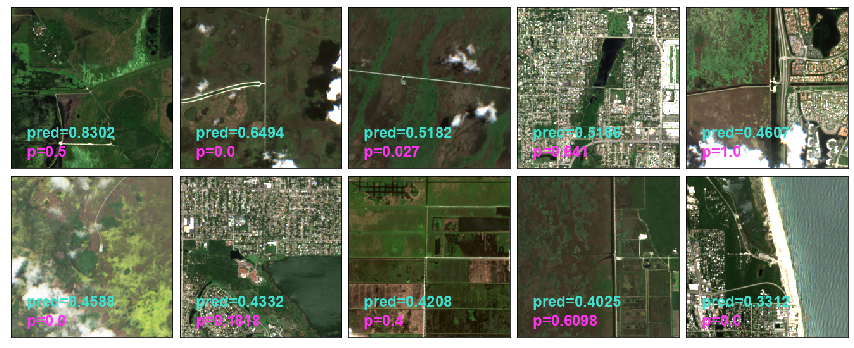

In [86]:
sub_val = sub[sub["split"]=="val"]
high_duck_pred = sub_val.sort_values(name_species+" pred", ascending=False)[:10]
high_duck_pred = high_duck_pred.reset_index()

# https://matplotlib.org/mpl_toolkits/axes_grid/users/overview.html

from mpl_toolkits.axes_grid1 import ImageGrid
fig = plt.figure(1,(15,15))
grid = ImageGrid(fig, 111,
                 nrows_ncols=(2,5),
                 axes_pad=0.1,
                 share_all=True
                 )
grid[0].get_yaxis().set_ticks([])
grid[0].get_xaxis().set_ticks([])
#"Sample locations with high presence of "+name_species
#plt.subplots_adjust(top=0.85)
for index, row in high_duck_pred.iterrows():
    rgb = np.load(os.path.join("/ecosystem-embedding/satellite_data/", row["hotspot_id"] +"_rgb.npy"))
    im = centercrop(rgb)
    im=write_text(im, "p=" + str(round(row[name_species], 4)))#, color = (255, 0,0))
    im = write_text(im, "pred=" + str(round(row[name_species + " pred"], 4)), pos = (25,190), color = (64, 224, 208))
    image =np.array(im)    
    grid[index].imshow(image,interpolation='none')

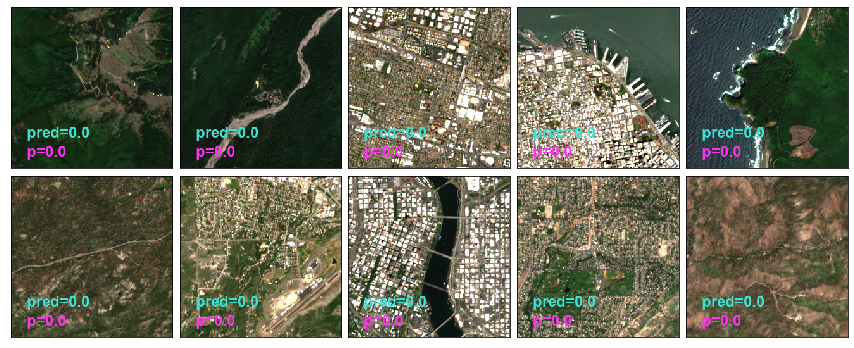

In [56]:
sub_val = sub[sub["split"]=="val"]
high_duck_pred = sub_val.sort_values(name_species+" pred", ascending=True)[:10]
high_duck_pred = high_duck_pred.reset_index()

# https://matplotlib.org/mpl_toolkits/axes_grid/users/overview.html

from mpl_toolkits.axes_grid1 import ImageGrid
fig = plt.figure(1,(15,15))
grid = ImageGrid(fig, 111,
                 nrows_ncols=(2,5),
                 axes_pad=0.1,
                 share_all=True
                 )
grid[0].get_yaxis().set_ticks([])
grid[0].get_xaxis().set_ticks([])
#"Sample locations with high presence of "+name_species
#plt.subplots_adjust(top=0.85)
for index, row in high_duck_pred.iterrows():
    rgb = np.load(os.path.join("/ecosystem-embedding/satellite_data/", row["hotspot_id"] +"_rgb.npy"))
    im = centercrop(rgb)
    im=write_text(im, "p=" + str(round(row[name_species], 4)))#, color = (255, 0,0))
    im = write_text(im, "pred=" + str(round(row[name_species + " pred"], 4)), pos = (25,190), color = (64, 224, 208))
    image =np.array(im)    
    grid[index].imshow(image,interpolation='none')

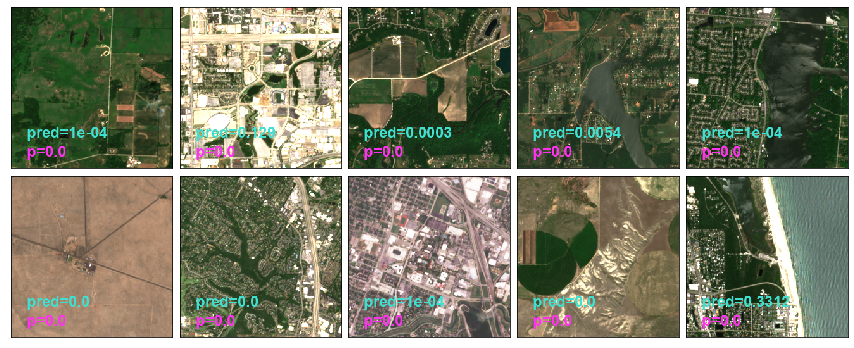

In [58]:
sub_val = sub[sub["split"]=="val"]
high_duck_pred = sub_val.sort_values(name_species, ascending=True)[:10]
high_duck_pred = high_duck_pred.reset_index()

# https://matplotlib.org/mpl_toolkits/axes_grid/users/overview.html

from mpl_toolkits.axes_grid1 import ImageGrid
fig = plt.figure(1,(15,15))
grid = ImageGrid(fig, 111,
                 nrows_ncols=(2,5),
                 axes_pad=0.1,
                 share_all=True
                 )
grid[0].get_yaxis().set_ticks([])
grid[0].get_xaxis().set_ticks([])
#"Sample locations with high presence of "+name_species
#plt.subplots_adjust(top=0.85)
for index, row in high_duck_pred.iterrows():
    rgb = np.load(os.path.join("/ecosystem-embedding/satellite_data/", row["hotspot_id"] +"_rgb.npy"))
    im = centercrop(rgb)
    im=write_text(im, "p=" + str(round(row[name_species], 4)))#, color = (255, 0,0))
    im = write_text(im, "pred=" + str(round(row[name_species + " pred"], 4)), pos = (25,190), color = (64, 224, 208))
    image =np.array(im)    
    grid[index].imshow(image,interpolation='none')

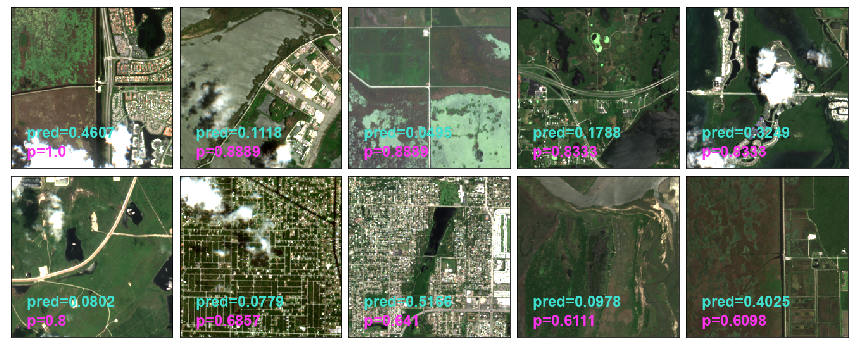

In [57]:
sub_val = sub[sub["split"]=="val"]
high_duck_pred = sub_val.sort_values(name_species, ascending=False)[:10]
high_duck_pred = high_duck_pred.reset_index()

# https://matplotlib.org/mpl_toolkits/axes_grid/users/overview.html

from mpl_toolkits.axes_grid1 import ImageGrid
fig = plt.figure(1,(15,15))
grid = ImageGrid(fig, 111,
                 nrows_ncols=(2,5),
                 axes_pad=0.1,
                 share_all=True
                 )
grid[0].get_yaxis().set_ticks([])
grid[0].get_xaxis().set_ticks([])
#"Sample locations with high presence of "+name_species
#plt.subplots_adjust(top=0.85)
for index, row in high_duck_pred.iterrows():
    rgb = np.load(os.path.join("/ecosystem-embedding/satellite_data/", row["hotspot_id"] +"_rgb.npy"))
    im = centercrop(rgb)
    im=write_text(im, "p=" + str(round(row[name_species], 4)))#, color = (255, 0,0))
    im = write_text(im, "pred=" + str(round(row[name_species + " pred"], 4)), pos = (25,190), color = (64, 224, 208))
    image =np.array(im)    
    grid[index].imshow(image,interpolation='none')

In [ ]:
# https://matplotlib.org/mpl_toolkits/axes_grid/users/overview.html
from mpl_toolkits.axes_grid1 import ImageGrid
fig = plt.figure(1,(10,10))
grid = ImageGrid(fig, 111,
                 nrows_ncols=(2,4),
                 axes_pad=0.1,
                 share_all=True
                 )
grid[0].get_yaxis().set_ticks([])
grid[0].get_xaxis().set_ticks([])
#"Sample locations with high presence of "+name_species
#plt.subplots_adjust(top=0.85)
for index, row in high_duck.iterrows():
    rgb = np.load(os.path.join("/ecosystem-embedding/satellite_data/", row["hotspot_id"] +"_rgb.npy"))
    im = centercrop(rgb)
    im=write_text(im, "p=" + str(round(row[name_species], 4)))
    image =np.array(im)    
    grid[index].imshow(image,interpolation='none')

In [85]:
val[val["Spatula cyanoptera"]>0.6]

Unnamed: 0  Unnamed: 0.1  Unnamed: 0.1.1 hotspot_id         lon  \
335          335           335             335    L818547 -110.194073   
922          922           922             922    L373417 -121.720000   
3170        3170          3170            3170   L1088266 -122.990302   
3618        3618          3618            3618    L493044 -123.346124   
4315        4315          4315            4315    L753048 -118.887563   
7420        7420          7420            7420   L3429881 -118.857951   
7846        7846          7846            7846    L737396 -107.935395   
7883        7883          7883            7883   L2342351 -118.854089   

            lat      county county_code       state state_code  ...  \
335   34.919438      Navajo   US-AZ-017     Arizona      US-AZ  ...   
922   41.948000    Siskiyou   US-CA-093  California      US-CA  ...   
3170  45.513001  Washington   US-OR-067      Oregon      US-OR  ...   
3618  44.520132      Benton   US-OR-003      Oregon      US-OR  ...   
4315  43.202486      Harney   US-OR-025      Oregon      US-OR  ...   
7420  37.639638        Mono   US-CA-051  California      US-CA  ...   
7846  38.842233       Delta   US-CO-029    Colorado      US-CO  ...   
7883  43.238598      Harney   US-OR-025      Oregon      US-OR  ...   

                         geometry  split  Accipiter cooperii  \
335   POINT (-110.19407 34.91944)    val                   0   
922   POINT (-121.72000 41.94800)    val                   0   
3170  POINT (-122.99030 45.51300)    val            0.166667   
3618  POINT (-123.34612 44.52013)    val          0.00377358   
4315  POINT (-118.88756 43.20249)    val                   0   
7420  POINT (-118.85795 37.63964)    val                   0   
7846  POINT (-107.93540 38.84223)    val                   0   
7883  POINT (-118.85409 43.23860)    val                   0   

      Accipiter cooperii pred  Aegolius acadicus Aegolius acadicus pred  \
335                0.00864245                  0            2.88761e-06   
922                0.00369869                  0             0.00036652   
3170               0.00964988                  0            6.09366e-06   
3618               0.00108337                  0            3.36933e-07   
4315               0.00816556                  0            1.94877e-05   
7420                0.0255171                  0            0.000387847   
7846               0.00827499                  0            8.58681e-05   
7883                0.0012904                  0            1.24761e-05   

     Anas rubripes Anas rubripes pred Spatula cyanoptera  \
335              0         2.5234e-06           0.636364   
922              0        9.36214e-07                0.8   
3170             0        1.27925e-07           0.666667   
3618             0        6.97385e-06           0.607547   
4315             0        3.42334e-07           0.666667   
7420             0        3.35538e-07                0.8   
7846             0        2.31889e-05           0.637681   
7883             0        1.24373e-05           0.642857   

     Spatula cyanoptera pred  
335                0.0115485  
922                 0.212612  
3170              0.00108655  
3618                0.103756  
4315              0.00270587  
7420               0.0519678  
7846                 0.32423  
7883               0.0981228  

[8 rows x 25 columns]

In [69]:
hs1 = "L737396"
hs2 = "L2342351"

In [71]:
from PIL import Image

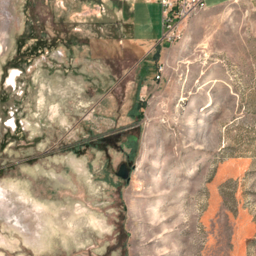

In [90]:
rgb = np.load("/ecosystem-embedding/satellite_data/L501746_rgb.npy")

im = Image.fromarray(np.transpose(rgb, (1,2,0)))
width, height = im.size   # Get dimensions
new_width = 256
new_height = 256
left = (width - new_width)/2
top = (height - new_height)/2
right = (width + new_width)/2
bottom = (height + new_height)/2

# Crop the center of the image
im = im.crop((left, top, right, bottom))

im

TypeError: loop of ufunc does not support argument 0 of type numpy.float64 which has no callable sqrt method

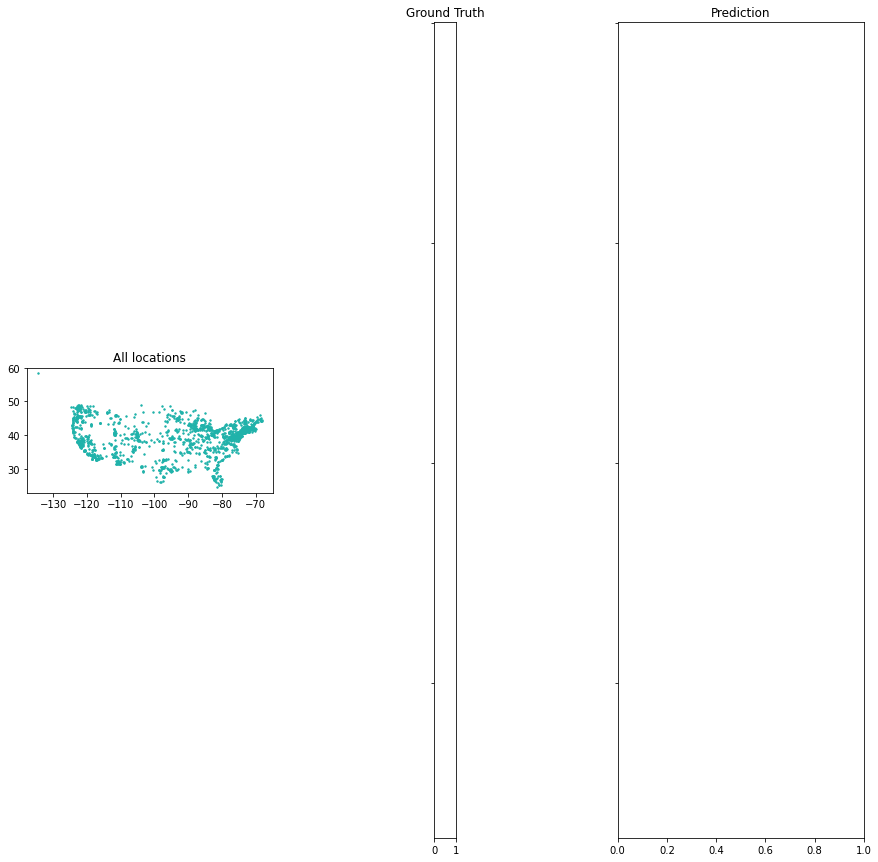

In [103]:
#California
#California
ig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15,15))
ax1.set_title('All locations')
ax2.set_title('Ground Truth')
ax3.set_title('Prediction')
#train_gdf.drop_duplicates(["geometry"]).boundary.plot(ax = ax, alpha = 0.4, edgecolor = "gray")
#geoDatav[geoDatav["STATE"].isin(["36"])].boundary.plot(ax=ax1, alpha = 0.1, edgecolor = "gray" )

#geoDatav[geoDatav["STATE"].isin(["36"])].boundary.plot(ax=ax2, alpha = 0.1, edgecolor = "gray" )

#geoDatav[geoDatav["STATE"].isin(["36"])].boundary.plot(ax=ax3, alpha = 0.1, edgecolor = "gray" )

sub_cali = sub #[sub["state_code"]=="US-CA"]
#sub_train = sub_cali[sub_cali["split"]=="train"]
sub_val = sub_cali[sub_cali["split"]=="val"]
#sub.plot(ax=ax,markersize= sub['Accipiter cooperii']*50)
#sub_train.plot(ax=ax1,markersize= sub_train['Accipiter cooperii']*70)
sub_val.plot(ax=ax1,markersize= 2, color="lightseagreen")

sub_val.plot(ax=ax2,markersize= sub_val[name_species+ ' pred']*100, color="lightseagreen")
#sub_train.plot(ax=ax2,markersize= sub_train['Accipiter cooperii pred']*70)

sub_val.plot(ax=ax3,markersize= sub_val[name_species]*100, color="lightseagreen")

plt.show()

In [ ]:

sub["Accipiter cooperii"] = sub["Accipiter cooperii"].astype(float)
sub['Accipiter cooperii pred'] = sub['Accipiter cooperii pred'].astype(float)

ig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(17,12))

#train_gdf.drop_duplicates(["geometry"]).boundary.plot(ax = ax, alpha = 0.4, edgecolor = "gray")
geoDatav[~geoDatav["STATE"].isin(["02", "15"])].boundary.plot(ax=ax1, alpha = 0.1, edgecolor = "gray" )

geoDatav[~geoDatav["STATE"].isin(["02", "15"])].boundary.plot(ax=ax2, alpha = 0.1, edgecolor = "gray" )

#sub.plot(ax=ax,markersize= sub['Accipiter cooperii']*50)
sub.plot(ax=ax1,markersize= sub['Accipiter cooperii']*50)
a = sub['Accipiter cooperii pred'].copy()
a[a <  10e-6] = 0
sub.plot(ax=ax2,markersize= a*50)
plt.show()

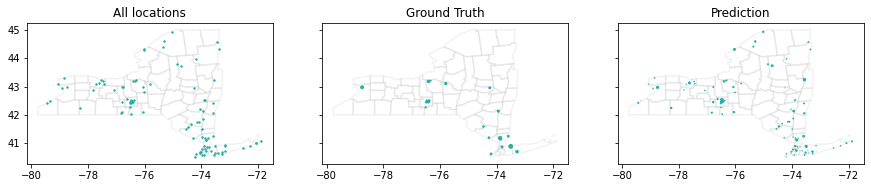

In [86]:
#California
ig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15,15))
ax1.set_title('All locations')
ax2.set_title('Ground Truth')
ax3.set_title('Prediction')
#train_gdf.drop_duplicates(["geometry"]).boundary.plot(ax = ax, alpha = 0.4, edgecolor = "gray")
geoDatav[geoDatav["STATE"].isin(["36"])].boundary.plot(ax=ax1, alpha = 0.1, edgecolor = "gray" )

geoDatav[geoDatav["STATE"].isin(["36"])].boundary.plot(ax=ax2, alpha = 0.1, edgecolor = "gray" )

geoDatav[geoDatav["STATE"].isin(["36"])].boundary.plot(ax=ax3, alpha = 0.1, edgecolor = "gray" )

sub_cali = sub[sub["state_code"]=="US-NY"]
#sub_train = sub_cali[sub_cali["split"]=="train"]
sub_val = sub_cali[sub_cali["split"]=="val"]
#sub.plot(ax=ax,markersize= sub['Accipiter cooperii']*50)
#sub_train.plot(ax=ax1,markersize= sub_train['Accipiter cooperii']*70)
sub_val.plot(ax=ax1,markersize= 2, color="lightseagreen")
sub_val.plot(ax=ax2,markersize= sub_val['Accipiter cooperii pred']*100, color="lightseagreen")
#sub_train.plot(ax=ax2,markersize= sub_train['Accipiter cooperii pred']*70)

sub_val.plot(ax=ax3,markersize= sub_val['Accipiter cooperii']*100, color="lightseagreen")

plt.show()

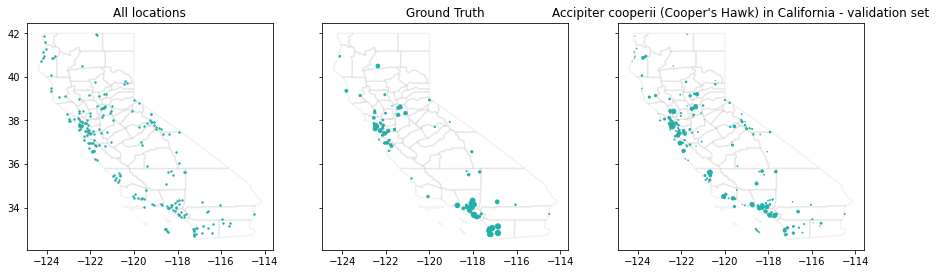

In [92]:
#California
ig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15,15))
ax1.set_title('All locations')
ax2.set_title('Ground Truth')
ax3.set_title('Prediction')
#train_gdf.drop_duplicates(["geometry"]).boundary.plot(ax = ax, alpha = 0.4, edgecolor = "gray")
geoDatav[geoDatav["STATE"].isin(["06"])].boundary.plot(ax=ax1, alpha = 0.1, edgecolor = "gray" )

geoDatav[geoDatav["STATE"].isin(["06"])].boundary.plot(ax=ax2, alpha = 0.1, edgecolor = "gray" )

geoDatav[geoDatav["STATE"].isin(["06"])].boundary.plot(ax=ax3, alpha = 0.1, edgecolor = "gray" )

sub_cali = sub[sub["state_code"]=="US-CA"]
#sub_train = sub_cali[sub_cali["split"]=="train"]
sub_val = sub_cali[sub_cali["split"]=="val"]
#sub.plot(ax=ax,markersize= sub['Accipiter cooperii']*50)
#sub_train.plot(ax=ax1,markersize= sub_train['Accipiter cooperii']*70)
sub_val.plot(ax=ax1,markersize= 2, color="lightseagreen")
sub_val.plot(ax=ax2,markersize= sub_val['Accipiter cooperii pred']*70, color="lightseagreen")
#sub_train.plot(ax=ax2,markersize= sub_train['Accipiter cooperii pred']*70)
ss= sub_val['Accipiter cooperii'].copy()
ss[ss<1e-5]=0
sub_val.plot(ax=ax3,markersize= sub_val['Accipiter cooperii']*70, color="lightseagreen")
plt.title("Accipiter cooperii (Cooper's Hawk) in California - validation set")
plt.show()

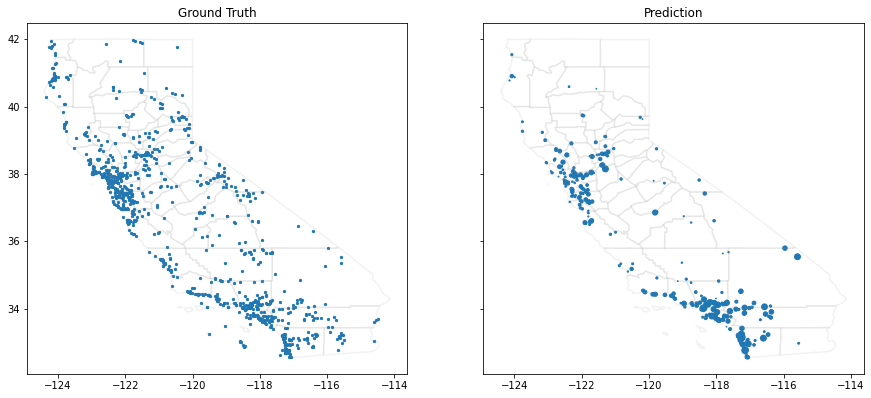

In [71]:
ig, (ax1, ax2,) = plt.subplots(1, 2, sharey=True, figsize=(15,20))
ax1.set_title('Ground Truth')
ax2.set_title('Prediction')
#train_gdf.drop_duplicates(["geometry"]).boundary.plot(ax = ax, alpha = 0.4, edgecolor = "gray")
geoDatav[geoDatav["STATE"].isin(["06"])].boundary.plot(ax=ax1, alpha = 0.1, edgecolor = "gray" )

geoDatav[geoDatav["STATE"].isin(["06"])].boundary.plot(ax=ax2, alpha = 0.1, edgecolor = "gray" )
sub_cali = sub[sub["state_code"]=="US-CA"]
sub_train = sub_cali[sub_cali["split"]=="train"]
sub_val = sub_cali[sub_cali["split"]=="val"]
#sub.plot(ax=ax,markersize= sub['Accipiter cooperii']*50)


sub_train.plot(ax=ax1,markersize= sub_train['Accipiter cooperii pred']*70)

sub_val.plot(ax=ax2,markersize= sub_val['Accipiter cooperii pred']*70, color="lightgreen")

plt.show()

/home/mila/t/tengmeli/.conda/envs/glc/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/home/mila/t/tengmeli/.conda/envs/glc/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/home/mila/t/tengmeli/.conda/envs/glc/lib/python3.6/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.o

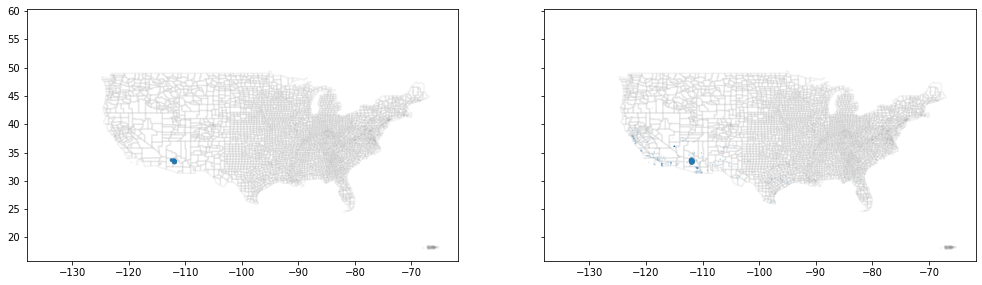

In [97]:
idx_species = 11
name_species = np.array(species)[non_songbird_idx][idx_species]

gdf[name_species] = ""
gdf[name_species + " pred"] = ""

path_gt = "/ecosystem-embedding/ebird_data_june/"

path_pred = "/network/projects/_groups/ecosystem-embeddings/ebird_checkpoints/resnet18_location_300_epochs/preds"

for index, row in gdf.iterrows():
    if row["split"] in ["train", "val"]:
        gdf[name_species + " pred"][index] = np.load(os.path.join(path_pred, gdf["hotspot_id"][index] + ".npy"))[idx_species]
        with open(os.path.join(path_gt, sub["hotspot_id"][index] + ".json")) as f:
            data=np.array(json.load(f)["probs"])[non_songbird_idx][idx_species]
        gdf[name_species][index] = data

sub= gdf[gdf["split"].isin(["train","val"])]

sub[name_species] = sub[name_species].astype(float)
sub[name_species + " pred"] = sub[name_species + " pred"].astype(float)

ig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(17,12))

#train_gdf.drop_duplicates(["geometry"]).boundary.plot(ax = ax, alpha = 0.4, edgecolor = "gray")
geoDatav[~geoDatav["STATE"].isin(["02", "15"])].boundary.plot(ax=ax1, alpha = 0.1, edgecolor = "gray" )

geoDatav[~geoDatav["STATE"].isin(["02", "15"])].boundary.plot(ax=ax2, alpha = 0.1, edgecolor = "gray" )

#sub.plot(ax=ax,markersize= sub['Accipiter cooperii']*50)
sub.plot(ax=ax1,markersize= sub[name_species]*70)
a = sub[name_species + " pred"].copy()
a[a <  10e-6] = 0
sub.plot(ax=ax2,markersize= a*70)
plt.show()

/home/mila/t/tengmeli/.conda/envs/glc/lib/python3.6/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


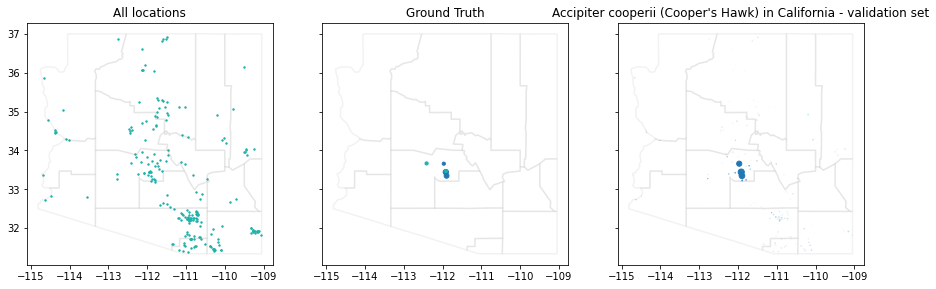

In [111]:
#Arizona
ig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15,15))
ax1.set_title('All locations')
ax2.set_title('Ground Truth')
ax3.set_title('Prediction')
#train_gdf.drop_duplicates(["geometry"]).boundary.plot(ax = ax, alpha = 0.4, edgecolor = "gray")
geoDatav[geoDatav["STATE"].isin(["04"])].boundary.plot(ax=ax1, alpha = 0.1, edgecolor = "gray" )

geoDatav[geoDatav["STATE"].isin(["04"])].boundary.plot(ax=ax2, alpha = 0.1, edgecolor = "gray" )

geoDatav[geoDatav["STATE"].isin(["04"])].boundary.plot(ax=ax3, alpha = 0.1, edgecolor = "gray" )

sub_cali = sub[sub["state_code"]=="US-AZ"]
sub_train = sub_cali[sub_cali["split"]=="train"]
sub_val = sub_cali[sub_cali["split"]=="val"]

sub_val.plot(ax=ax1,markersize= 2, color="lightseagreen")
sub_train.plot(ax=ax1,markersize= 2, color="lightseagreen")

sub_train.plot(ax=ax2,markersize= sub_train[name_species ]*70)
sub_val.plot(ax=ax2,markersize= sub_val[name_species ]*70, color="lightseagreen")
             
sub_train.plot(ax=ax3,markersize= sub_train[name_species + " pred"]*70)
ss= sub_val.copy()
ss[ss[name_species + " pred"] < 1e-5][name_species + " pred"] = 0
sub_val.plot(ax=ax3,markersize= ss[name_species + " pred"]*70, color="lightseagreen")
plt.title("Accipiter cooperii (Cooper's Hawk) in California - validation set")
plt.show()

In [ ]:
ss[ss[name_species + " pred"]<0.5]

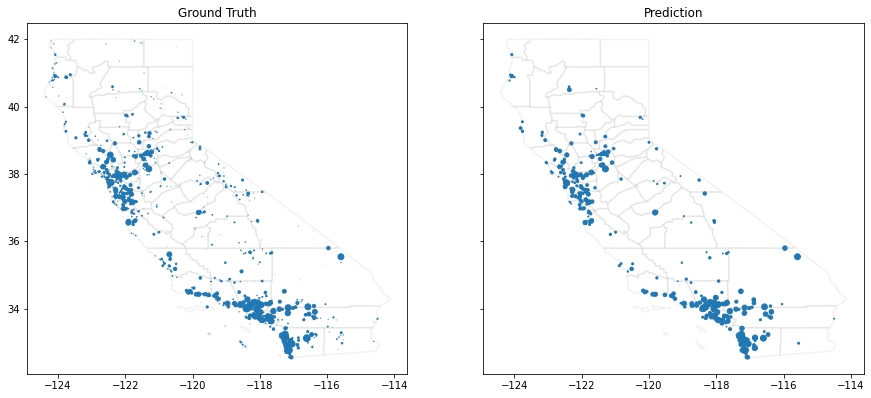

In [60]:
#California
ig, (ax1, ax2,) = plt.subplots(1, 2, sharey=True, figsize=(15,15))
ax1.set_title('Ground Truth')
ax2.set_title('Prediction')
#train_gdf.drop_duplicates(["geometry"]).boundary.plot(ax = ax, alpha = 0.4, edgecolor = "gray")
geoDatav[geoDatav["STATE"].isin(["06"])].boundary.plot(ax=ax1, alpha = 0.1, edgecolor = "gray" )

geoDatav[geoDatav["STATE"].isin(["06"])].boundary.plot(ax=ax2, alpha = 0.1, edgecolor = "gray" )

#sub.plot(ax=ax,markersize= sub['Accipiter cooperii']*50)
sub[sub["state_code"]=="US-CA"].plot(ax=ax1,markersize= sub[sub["state_code"]=="US-CA"]['Accipiter cooperii']*70)
a = sub[sub["state_code"]=="US-CA"]['Accipiter cooperii pred'].copy()
#a[a <  10e-6] = 0
sub[sub["state_code"]=="US-CA"].plot(ax=ax2,markersize= a*70)
plt.show()

In [ ]:
#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

In [3]:
state = "US-CA"

In [4]:
subset = df[df["state_code"]==state]

In [145]:
len(subset)

1062

In [146]:
import glob
import os
import json 
import pandas as pd

datapath = "/ecosystem-embedding/satellite_data/"
species_data = "/ecosystem-embedding/ebird_data_june/"

#path of csv where we want to save info 
save_path = "/ecosystem-embedding/validation_files/california.csv"

keys = [os.path.basename(a).strip(".json") for a in glob.glob(species_data + "/*")]

hs_list = subset.hotspot_id.values

hs_list = list(dict.fromkeys(hs_list))
hs_list = [hs for hs in hs_list if hs in keys]

rgb_paths = [os.path.join(datapath, f"{hs}_rgb.npy") for hs in hs_list]
json_paths = [os.path.join(datapath, f"{hs}.json") for hs in hs_list]
nir_paths = [os.path.join(datapath, f"{hs}_ni.npy") for hs in hs_list]
r_paths = [os.path.join(datapath, f"{hs}_r.npy") for hs in hs_list]
g_paths = [os.path.join(datapath, f"{hs}_g.npy") for hs in hs_list]
b_paths = [os.path.join(datapath, f"{hs}_b.npy") for hs in hs_list]

species = [os.path.join(species_data, f"{hs}.json") for hs in hs_list]


dataset = pd.DataFrame(list(zip(hs_list, r_paths, g_paths, b_paths,nir_paths, json_paths, rgb_paths,
                                species,
                                )),

              columns=["hotspot", "r", "g", "b","nir", "meta", "rgb","species"])


dataset.to_csv(save_path)

In [5]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

%matplotlib inline

In [6]:
path = "/ecosystem-embedding/validation_files/california.csv"

In [149]:
from omegaconf import OmegaConf, DictConfig
from src.trainer.trainer import EbirdTask, EbirdDataModule
import pytorch_lightning as pl
from pytorch_lightning import loggers as pl_loggers
from pytorch_lightning import Trainer
from pytorch_lightning.loggers import CometLogger
from pytorch_lightning.callbacks import EarlyStopping, ModelCheckpoint, LearningRateMonitor
from typing import Any, Dict, Tuple, Type, cast
from src.dataset.utils import set_data_paths
import pdb
import torch.nn as nn
from PIL import Image
import torch

In [150]:

conf = OmegaConf.load("/ecosystem-embedding/configs/defaults.yaml")
config_fn = "/ecosystem-embedding/configs/california.yaml"

if os.path.isfile(config_fn):
    user_conf = OmegaConf.load(config_fn)
    conf = OmegaConf.merge(conf, user_conf)
else:
    raise FileNotFoundError(f"config_file={config_fn} is not a valid file")

conf = set_data_paths(conf)
conf = cast(DictConfig, conf)  # convince mypy that everything is alright


In [151]:
def get_meta(df, index):
    meta = load_file(get_path(df, index, "meta"))
    return(meta)

def get_img(df, index):
    band_npy = load_file(get_path(df, index, "rgb"))
    return (band_npy)

def get_img(df, index, new_width = 256, new_height = 256):
    band_npy = load_file(get_path(df, index, "rgb"))
   
    im = Image.fromarray(np.transpose(band_npy, (1,2,0)))
    width, height = im.size   # Get dimensions

    left = (width - new_width)/2
    top = (height - new_height)/2
    right = (width + new_width)/2
    bottom = (height + new_height)/2

    # Crop the center of the image
    im = im.crop((left, top, right, bottom))
    return(im)

In [152]:
task = EbirdTask(conf)
datamodule = EbirdDataModule(conf)
trainer_args = cast(Dict[str, Any], OmegaConf.to_object(conf.trainer))

Training with BCE Loss


In [153]:
PATH = "/ecosystem-embedding/ckpt/songbird_resnet18/last.ckpt"

state_dict = torch.load(PATH)["state_dict"]

for key in list(state_dict.keys()):
    state_dict[key.replace('model.', '')] = state_dict.pop(key)


task.model.load_state_dict(state_dict)
task.model.eval()
m = nn.Sigmoid()

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [154]:
def infer(batch, model):
    x = batch['sat'].squeeze(1).to(device)
    y = batch['target'].to(device)
    y_hat = model(x)
    pred = m(y_hat)
    return(pred)

datamodule.setup()
test_dataloader = datamodule.val_dataloader()

/home/mila/t/tengmeli/.conda/envs/ebird-env/lib/python3.6/site-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [155]:
subset

Unnamed: 0 hotspot_id         lon        lat       county county_code  \
19            19   L2240252 -120.433674  39.832260       Plumas   US-CA-063   
31            31    L373858 -124.227980  40.645220     Humboldt   US-CA-023   
33            33   L1764908 -121.961481  37.433465  Santa Clara   US-CA-085   
44            44   L9946491 -121.225700  38.678348   Sacramento   US-CA-067   
46            46    L278588 -116.309793  33.836986    Riverside   US-CA-065   
...          ...        ...         ...        ...          ...         ...   
8625        8625    L917353 -117.690064  34.214065  Los Angeles   US-CA-037   
8627        8627    L791595 -121.155167  40.223976       Plumas   US-CA-063   
8630        8630    L589444 -119.862385  37.795542     Tuolumne   US-CA-109   
8633        8633   L2146581 -123.084710  39.002042    Mendocino   US-CA-045   
8636        8636    L522347 -121.765240  36.572932     Monterey   US-CA-053   

           state state_code  june_complete_checklists  num_checklists  \
19    California      US-CA                        16             248   
31    California      US-CA                         7             199   
33    California      US-CA                        33            1176   
44    California      US-CA                        42             850   
46    California      US-CA                        91            2618   
...          ...        ...                       ...             ...   
8625  California      US-CA                         9             119   
8627  California      US-CA                        18             209   
8630  California      US-CA                       110             408   
8633  California      US-CA                       141            3013   
8636  California      US-CA                        10             251   

      num_complete_checklists  num_different_species  
19                        211                    147  
31                        177                    127  
33                        974                    179  
44                        830                    110  
46                       2288                    176  
...                       ...                    ...  
8625                      116                     93  
8627                      158                    192  
8630                      318                    133  
8633                     2327                    218  
8636                      193                    150  

[1062 rows x 12 columns]

In [156]:
idx = 3

In [157]:
subset["ground_truth"] = ""
subset["pred"] = ""

/home/mila/t/tengmeli/.conda/envs/ebird-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/mila/t/tengmeli/.conda/envs/ebird-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [158]:
preds = []
hs= []
for batch in test_dataloader:
    pred = infer(batch, task.model)
    for n, i in enumerate(pred):
        row = subset[subset["hotspot_id"] == batch["hotspot_id"][n]].index.item()

        subset.loc[row,"pred"] = i[idx].item()
        subset.loc[row,"ground_truth"] =  batch["original_target"][n][idx].item()
        

/home/mila/t/tengmeli/.conda/envs/ebird-env/lib/python3.6/site-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/home/mila/t/tengmeli/.conda/envs/ebird-env/lib/python3.6/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [170]:
subset = subset[subset["ground_truth"]!='']

In [171]:
subset.to_csv("./california_pred.csv")

In [172]:
subset.head()

Unnamed: 0 hotspot_id         lon        lat       county county_code  \
19          19   L2240252 -120.433674  39.832260       Plumas   US-CA-063   
31          31    L373858 -124.227980  40.645220     Humboldt   US-CA-023   
33          33   L1764908 -121.961481  37.433465  Santa Clara   US-CA-085   
44          44   L9946491 -121.225700  38.678348   Sacramento   US-CA-067   
46          46    L278588 -116.309793  33.836986    Riverside   US-CA-065   

         state state_code  june_complete_checklists  num_checklists  \
19  California      US-CA                        16             248   
31  California      US-CA                         7             199   
33  California      US-CA                        33            1176   
44  California      US-CA                        42             850   
46  California      US-CA                        91            2618   

    num_complete_checklists  num_different_species ground_truth      pred  
19                      211                    147         0.75  0.272362  
31                      177                    127     0.714286  0.913363  
33                      974                    179     0.212121  0.794723  
44                      830                    110            0  0.323251  
46                     2288                    176            0  0.448659

In [173]:
ny = gpd.read_file(gpd.datasets.get_path('nybb'))


In [174]:
ny

BoroCode       BoroName     Shape_Leng    Shape_Area  \
0         5  Staten Island  330470.010332  1.623820e+09   
1         4         Queens  896344.047763  3.045213e+09   
2         3       Brooklyn  741080.523166  1.937479e+09   
3         1      Manhattan  359299.096471  6.364715e+08   
4         2          Bronx  464392.991824  1.186925e+09   

                                            geometry  
0  MULTIPOLYGON (((970217.022 145643.332, 970227....  
1  MULTIPOLYGON (((1029606.077 156073.814, 102957...  
2  MULTIPOLYGON (((1021176.479 151374.797, 102100...  
3  MULTIPOLYGON (((981219.056 188655.316, 980940....  
4  MULTIPOLYGON (((1012821.806 229228.265, 101278...

In [175]:
ny = ny.to_crs(epsg=4326)

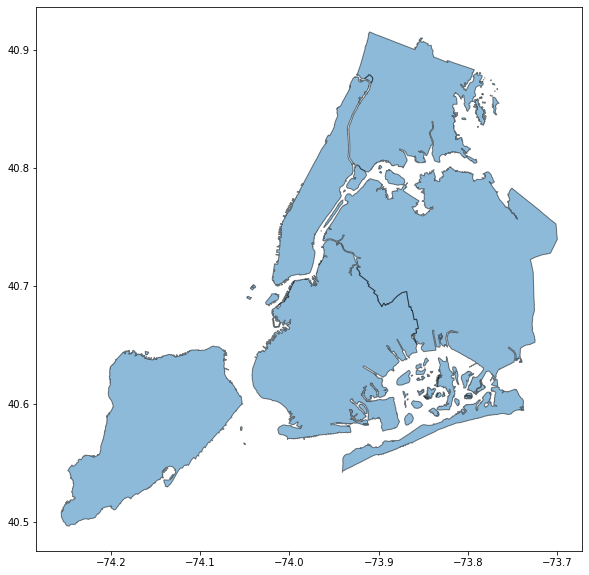

In [176]:
ax = ny.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')

In [177]:
subset["county"].unique()

array(['Plumas', 'Humboldt', 'Santa Clara', 'Sacramento', 'Riverside',
       'Kern', 'Alameda', 'San Mateo', 'Los Angeles', 'San Bernardino',
       'Kings', 'Yolo', 'Mono', 'San Diego', 'Santa Barbara', 'Marin',
       'Alpine', 'Orange', 'San Luis Obispo', 'Nevada', 'Sonoma',
       'Monterey', 'Santa Cruz', 'Stanislaus', 'Madera', 'Del Norte',
       'San Francisco', 'Contra Costa', 'Inyo', 'Mendocino', 'Siskiyou',
       'Imperial', 'El Dorado', 'Ventura', 'San Joaquin', 'Butte', 'Lake',
       'Shasta', 'Fresno', 'Lassen', 'Amador', 'Placer', 'Solano', 'Napa',
       'Mariposa', 'San Benito', 'Sierra', 'Yuba', 'Tulare', 'Tuolumne',
       'Calaveras', 'Tehama', 'Modoc', 'Merced', 'Glenn', 'Colusa',
       'Sutter'], dtype=object)

In [178]:
subset_ny = subset[subset["county"].isin(['New York', 'Bronx', 'Queens'])]

In [197]:
a = (255*subset["ground_truth"].values).astype(np.uint8)
b = (255*subset["pred"].values).astype(np.uint8)

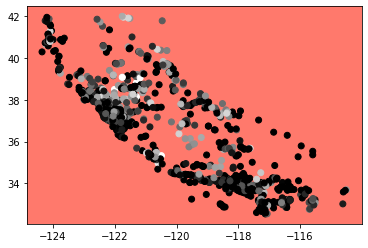

In [199]:
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.set_facecolor('xkcd:salmon')
plt.scatter(x=subset["lon"], y=subset["lat"],  c = a)
plt.gray()

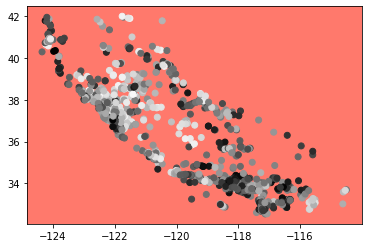

In [200]:
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.set_facecolor('xkcd:salmon')
plt.scatter(x=subset["lon"], y=subset["lat"],  c = b)
plt.gray()

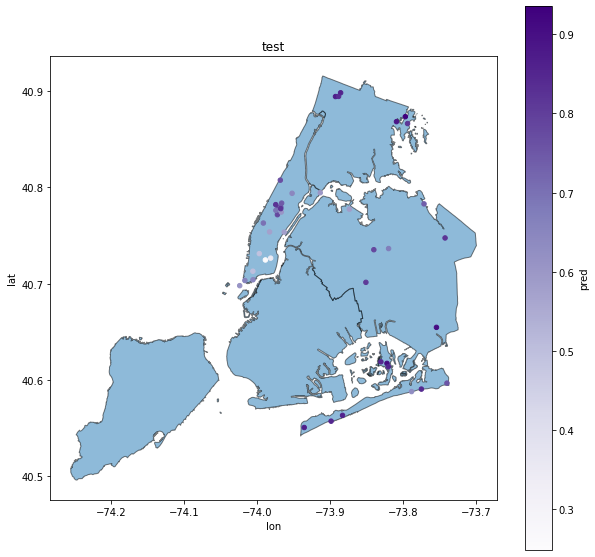

In [53]:
ax = ny.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')

subset_ny.plot(x="lon", y="lat", kind="scatter", c = "pred", colormap="Purples", 
        title="test", 
        ax=ax)
plt.show()

In [22]:
ny.crs

<Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich